In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
excel_file = pd.read_excel('C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset2.xlsx', sheet_name=None)

In [4]:
print(excel_file.keys())

dict_keys(['Demographics', 'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6', 'Week_7', 'Week_8', 'Week_9', 'Week_10', 'Week_11'])


In [7]:
# Example: Access specific sheet
df1 = excel_file['Week_1']

# Or loop through all sheets
for Week_1, df in excel_file.items():
    print(f"Sheet: Week_1")
    print(df.head())

Sheet: Week_1
   ID List of Countries  \
0   1           Algeria   
1   2           Algeria   
2   3           Algeria   
3   4           Algeria   
4   5             China   

   What is your year of birth (Just the year, e.g. 1995) ?  \
0                                               1996         
1                                               1996         
2                                               1990         
3                                               1991         
4                                               1998         

   How do you describe yourself? - Selected Choice  \
0                                                1   
1                                                1   
2                                                2   
3                                                1   
4                                                1   

   What is your first degree subject area?  \
0                                     18.0   
1                                

In [9]:
# Shape and structure
print(df1.shape)
print(df1.columns)

# Data types and non-null counts
print(df1.info())

# Summary statistics (numerical columns)
print(df1.describe())

(212, 38)
Index(['CW2', 'CW3', 'CW4', 'CC1 [FA] (100)', 'Overall Result',
       'Q12 List of Countries',
       'Q14 What is your year of birth (Just the year, e.g. 1995) ?',
       'Q10 How do you describe yourself? - Selected Choice',
       'Q16 What is your first degree subject area?', 'Student_ID',
       'Date_Range_Week1', 'Student Activity by Day in hours Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Avg course & student time &logins Student Time in Course',
       'Avg_Time_Per_User', 'Total_Items', 'Total_Logins',
       'Student Activity by Item in the Course total time spent in hours Assignments',
       'Learning_Materials_Time', 'Module_Info_Time', 'Reading_List_Time',
       'Time_accessed_week 1', 'Time_accessed_week 2',
       'Number of Times Accessed Assignments',
       'Time_accessed_Learning_Materials',
       'Time_accessed_Module Information (Handbook)',
       'Time_accessed_Reading_list', 'Time_accessed_week_1',
 

CW2                                                                             0
CW3                                                                             0
CW4                                                                             0
CC1 [FA] (100)                                                                  0
Overall Result                                                                  0
Q12 List of Countries                                                           0
Q14 What is your year of birth (Just the year, e.g. 1995) ?                     0
Q10 How do you describe yourself? - Selected Choice                             0
Q16 What is your first degree subject area?                                     0
Student_ID                                                                      0
Date_Range_Week1                                                                0
Student Activity by Day in hours Monday                                         0
Tuesday         

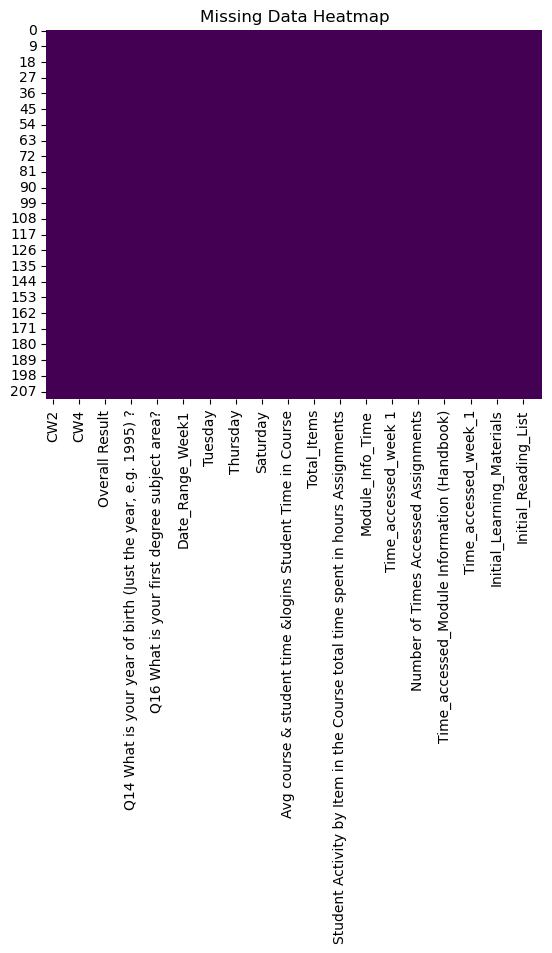

In [11]:
 # Total missing values per column
print(df1.isnull().sum())

# Visualize missing data (optional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [13]:
# Count duplicates
print("Duplicate rows:", df1.duplicated().sum())

# Optionally remove them
df1 = df1.drop_duplicates()

Duplicate rows: 0


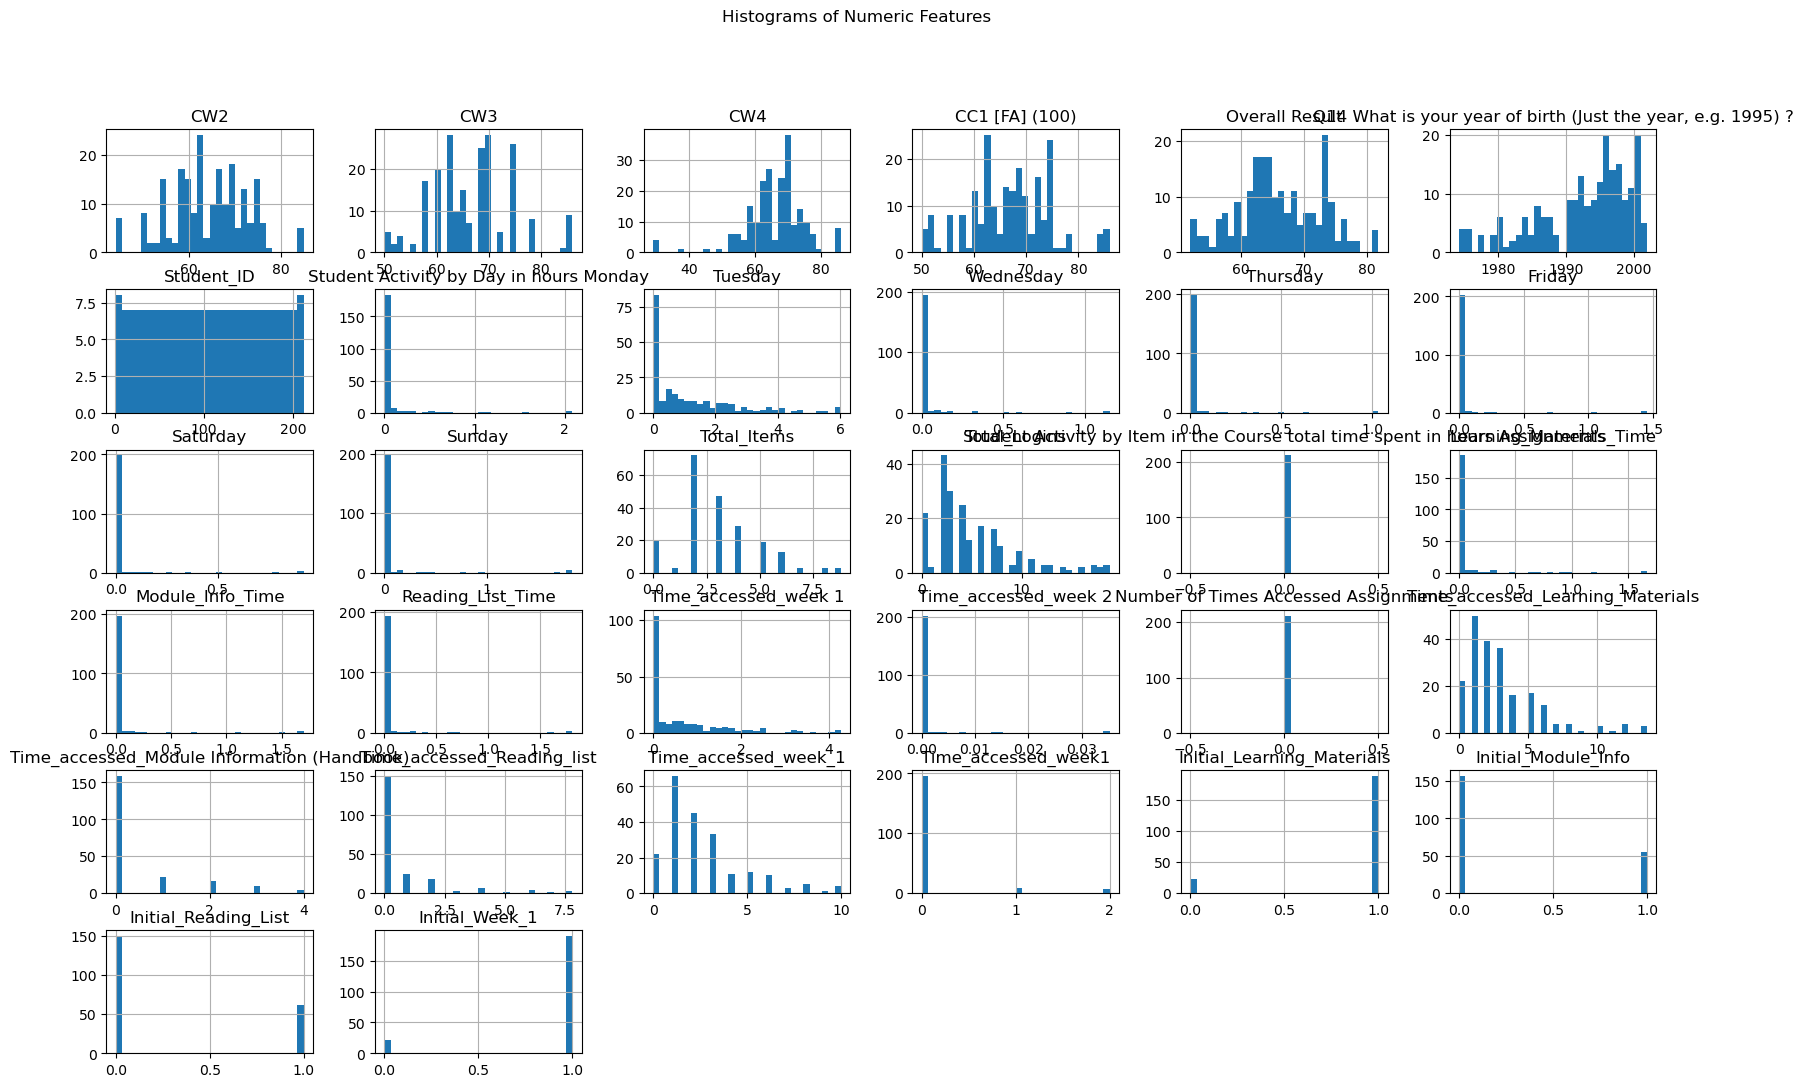

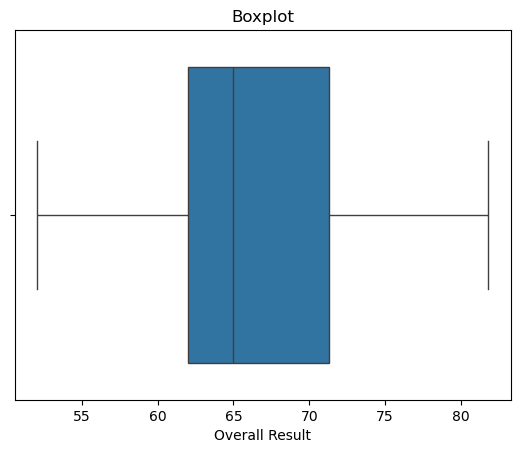

In [15]:
df1.hist(bins=30, figsize=(20, 12))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Boxplot example
sns.boxplot(x=df1['Overall Result'])  # Replace with actual column name
plt.title("Boxplot")
plt.show()

In [16]:
print(df1.columns.tolist())


['CW2', 'CW3', 'CW4', 'CC1 [FA] (100)', 'Overall Result', 'Q12 List of Countries', 'Q14 What is your year of birth (Just the year, e.g. 1995) ?', 'Q10 How do you describe yourself? - Selected Choice', 'Q16 What is your first degree subject area?', 'Student_ID', 'Date_Range_Week1', 'Student Activity by Day in hours Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Avg course & student time &logins Student Time in Course', 'Avg_Time_Per_User', 'Total_Items', 'Total_Logins', 'Student Activity by Item in the Course total time spent in hours Assignments', 'Learning_Materials_Time', 'Module_Info_Time', 'Reading_List_Time', 'Time_accessed_week 1', 'Time_accessed_week 2', 'Number of Times Accessed Assignments', 'Time_accessed_Learning_Materials', 'Time_accessed_Module Information (Handbook)', 'Time_accessed_Reading_list', 'Time_accessed_week_1', 'Time_accessed_week1', 'Initial_Learning_Materials', 'Initial_Module_Info', 'Initial_Reading_List', 'Initial_Week_1']


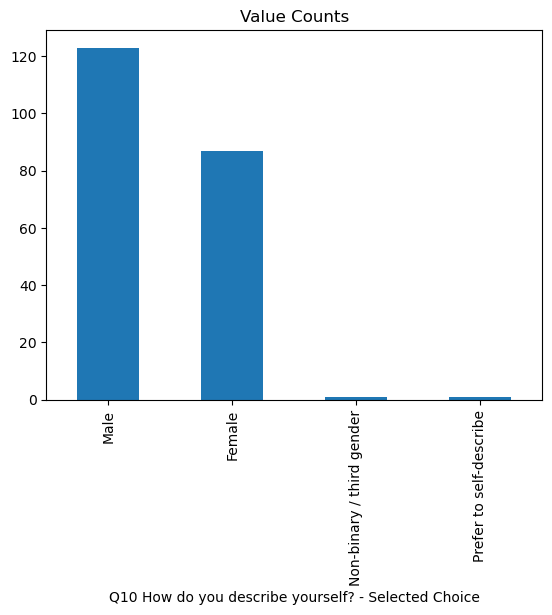

In [17]:
# Bar plot for a categorical feature
df1['Q10 How do you describe yourself? - Selected Choice'].value_counts().plot(kind='bar')
plt.title("Value Counts")
plt.show()

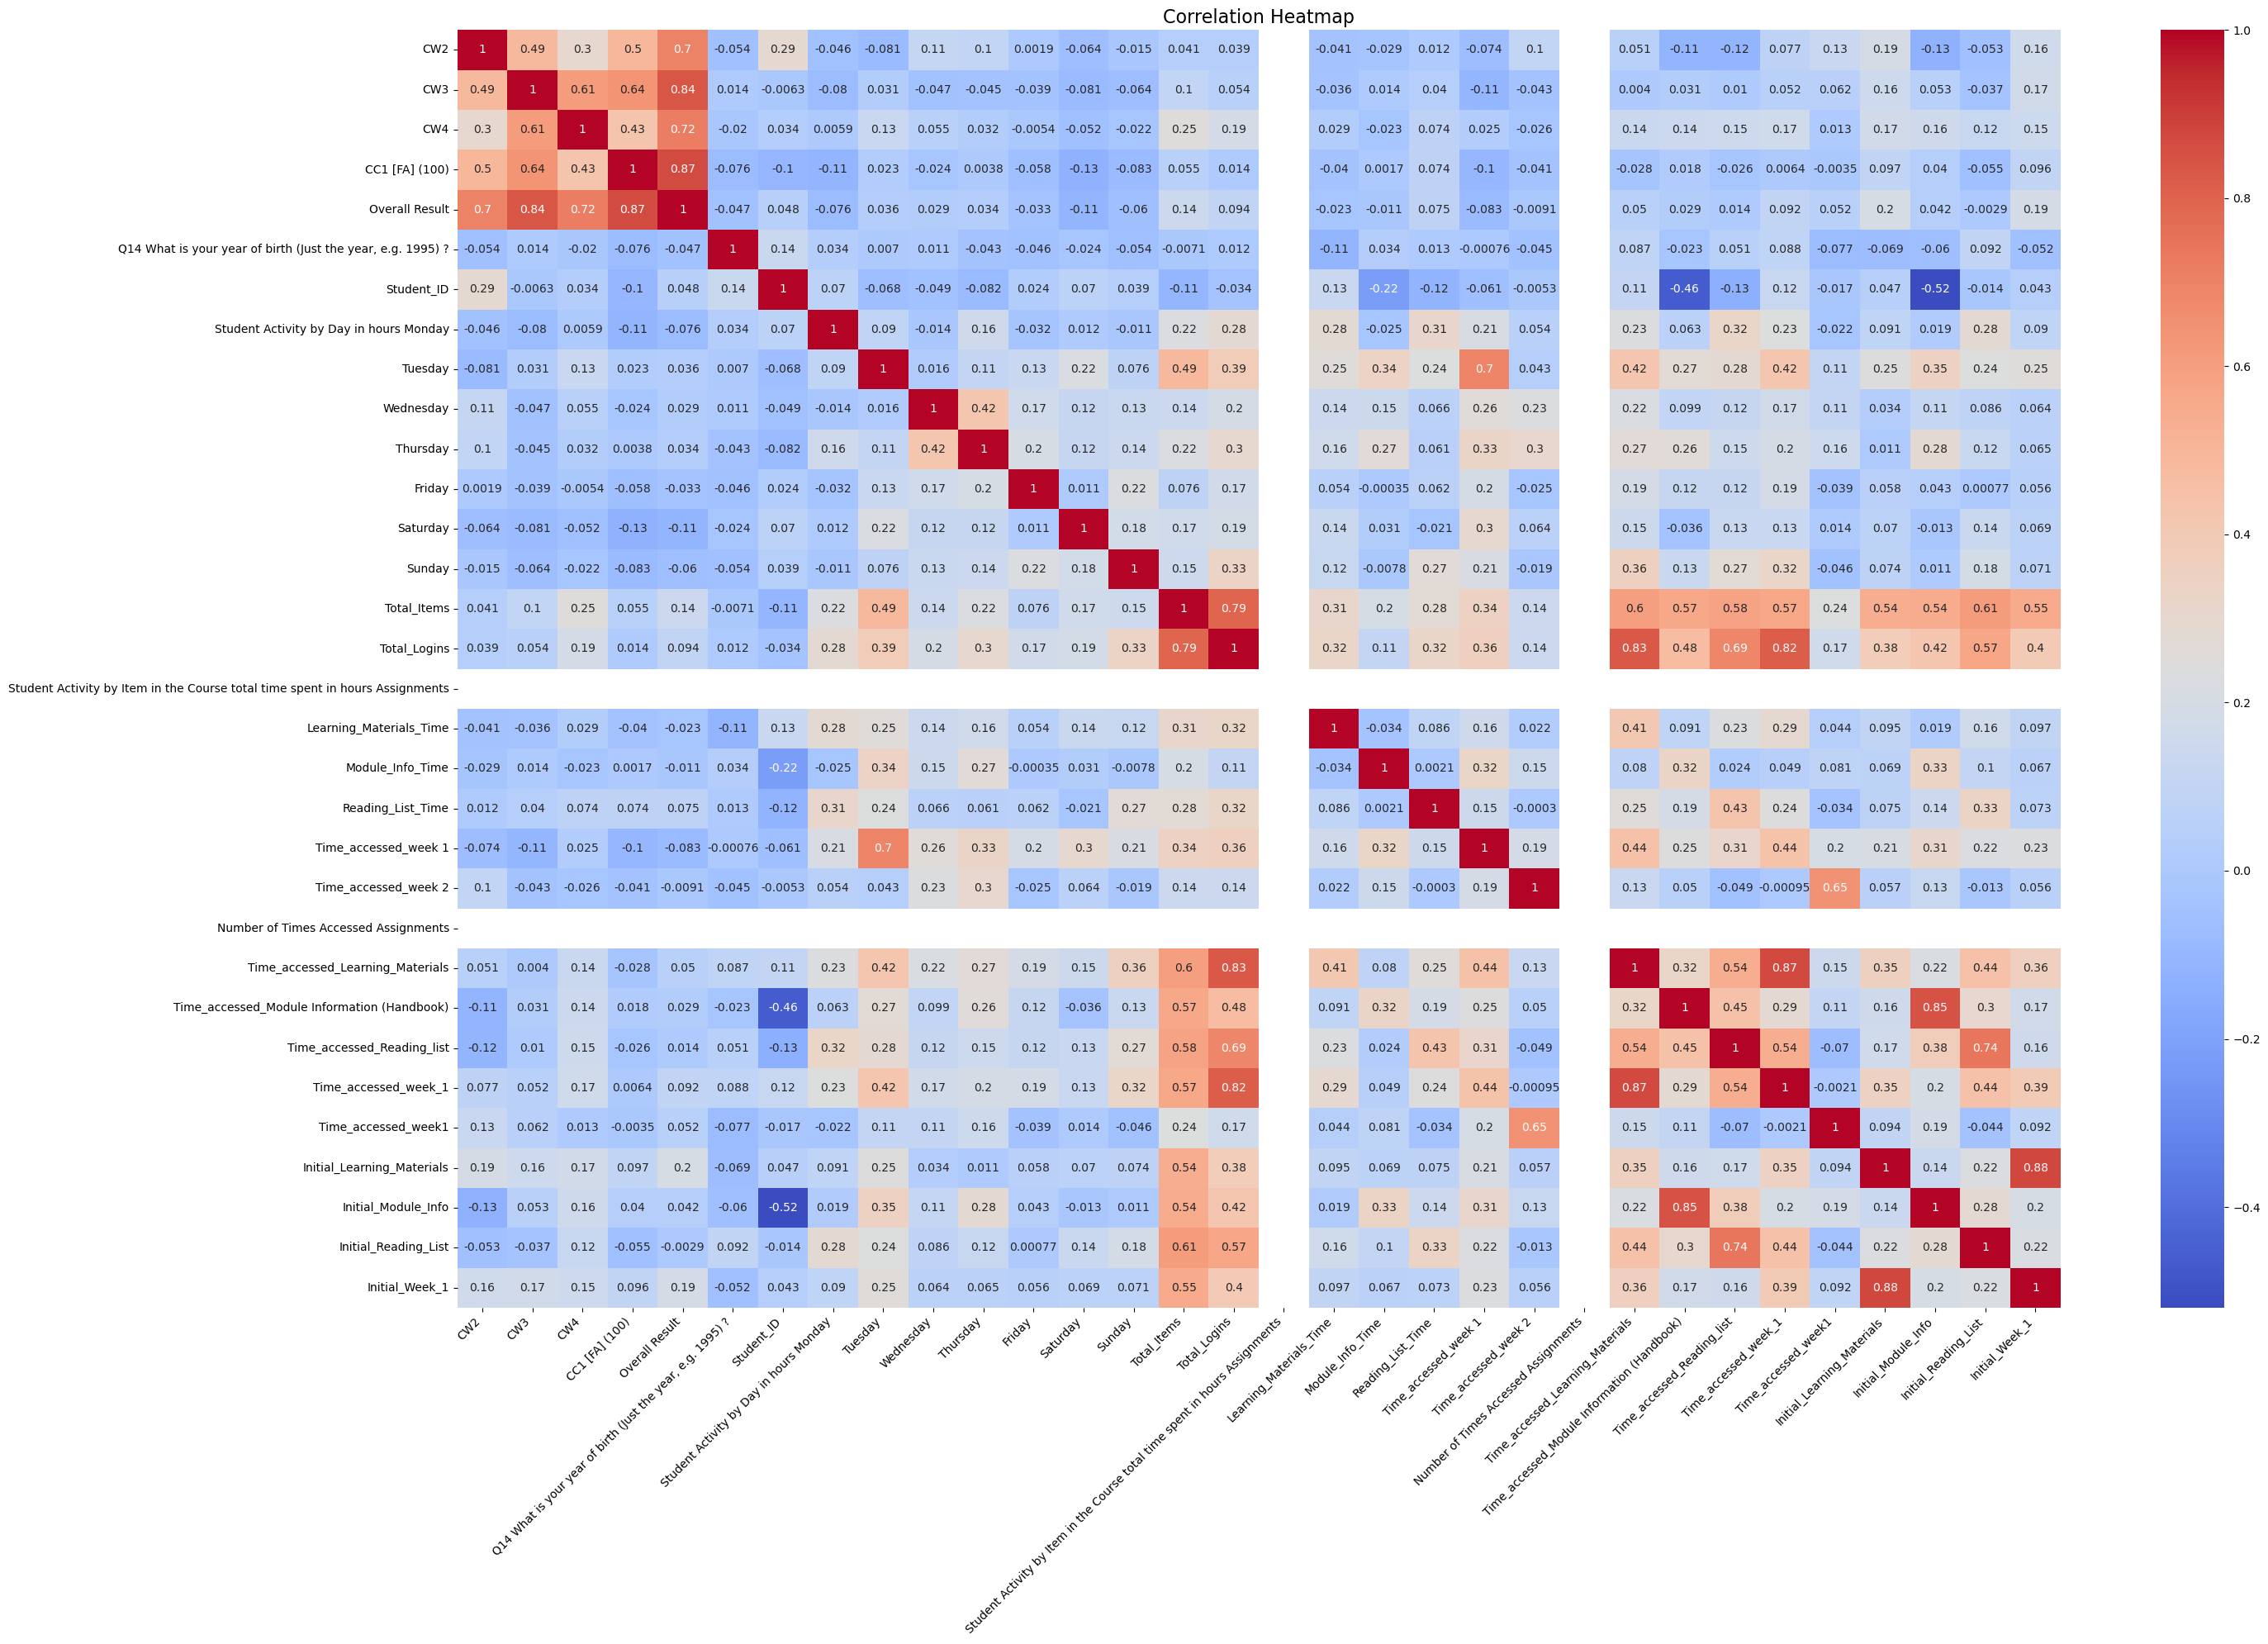

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 20))  # Adjust size here (width, height)
corr = df1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x labels
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

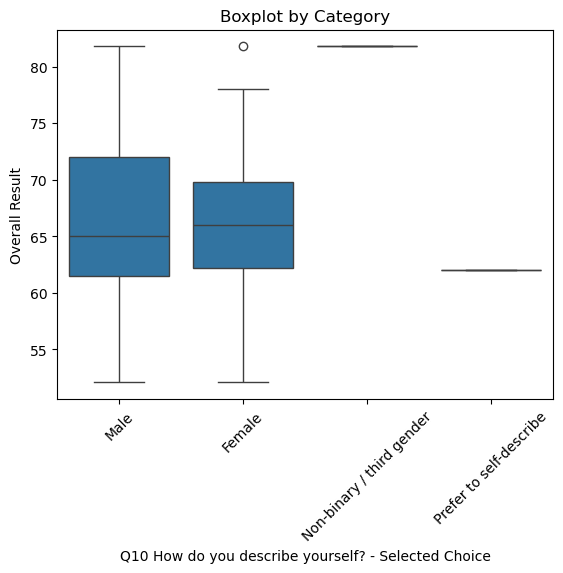

In [22]:
# Boxplot: distribution of numerical feature across categories
sns.boxplot(x='Q10 How do you describe yourself? - Selected Choice', y='Overall Result', data=df1)
plt.xticks(rotation=45)
plt.title("Boxplot by Category")
plt.show()

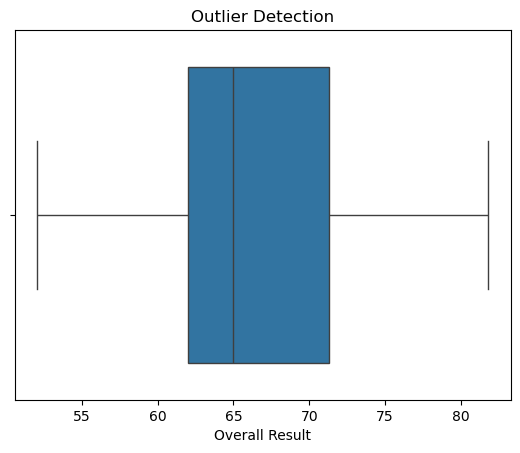

In [41]:
# Using boxplot
sns.boxplot(x=df1['Overall Result'])
plt.title("Outlier Detection")
plt.show()

In [45]:
combined_df = pd.concat(excel_file.values(), ignore_index=True)

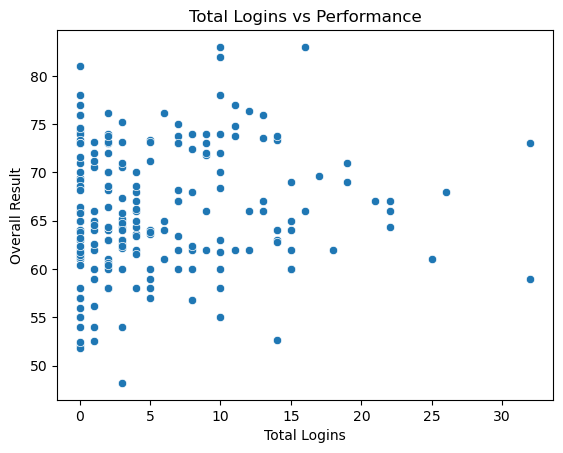

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with your actual column names
sns.scatterplot(data=df, x='Total_Logins', y='Overall Result')
plt.title("Total Logins vs Performance")
plt.xlabel("Total Logins")
plt.ylabel("Overall Result")
plt.show()


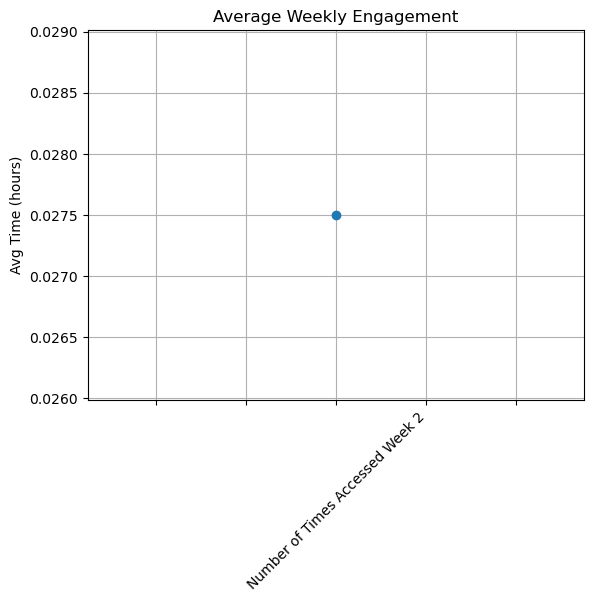

In [29]:
# Replace with actual weekly columns from your dataset
weekly_columns = [col for col in df.columns if 'Week' in col and 'Time' in col]
df[weekly_columns].mean().plot(kind='line', marker='o', title='Average Weekly Engagement')
plt.ylabel("Avg Time (hours)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


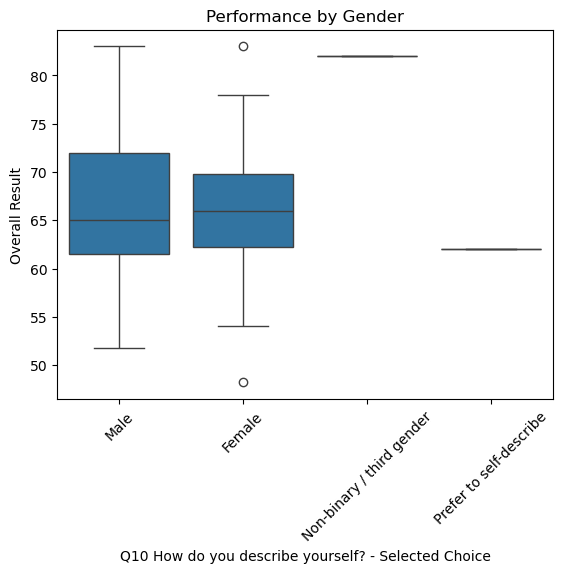

In [33]:
# Replace with your column names
sns.boxplot(data=df, x='Q10 How do you describe yourself? - Selected Choice', y='Overall Result')
plt.title("Performance by Gender")
plt.xticks(rotation=45)
plt.show()


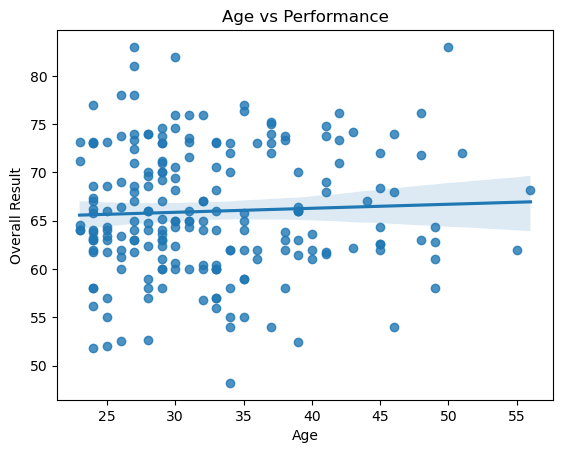

In [37]:
df['Age'] = 2025 - df['Q14 What is your year of birth (Just the year, e.g. 1995) ?']
sns.regplot(data=df, x='Age', y='Overall Result')
plt.title("Age vs Performance")
plt.show()


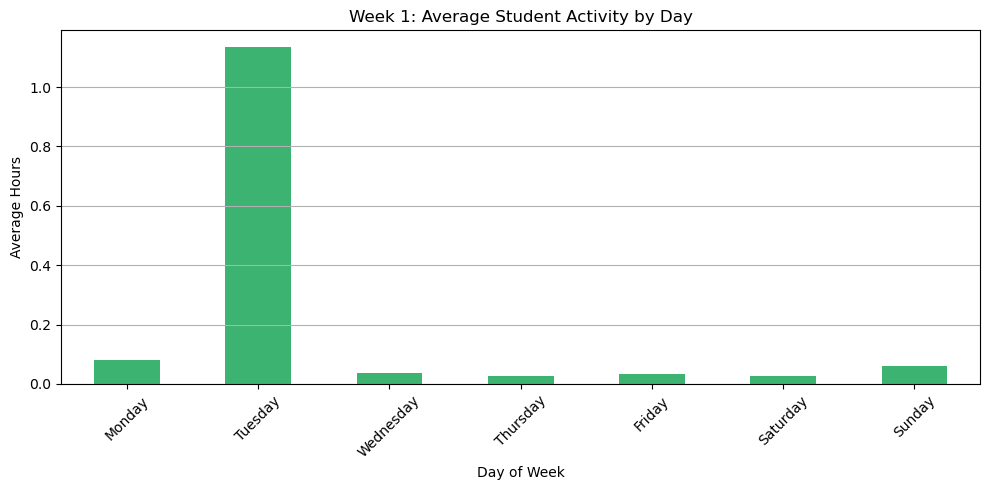

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_1')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 1: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


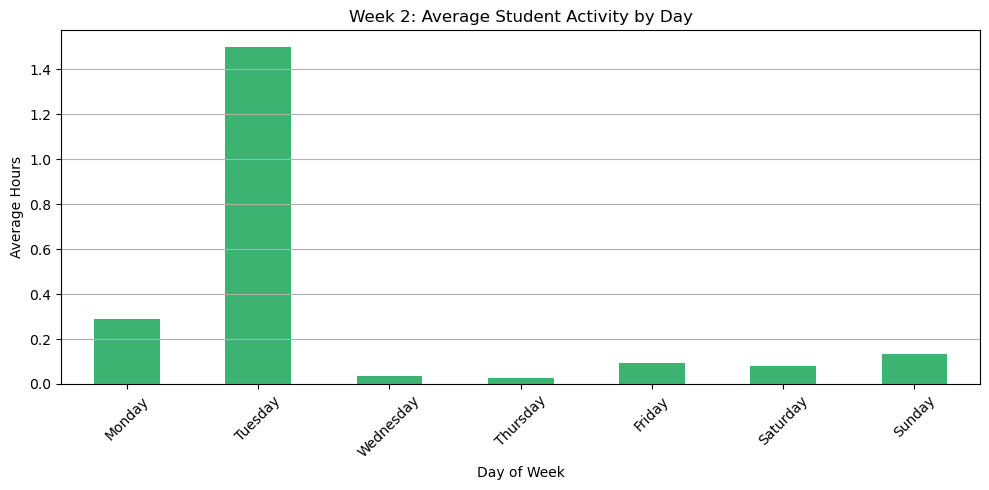

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_2')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 2: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


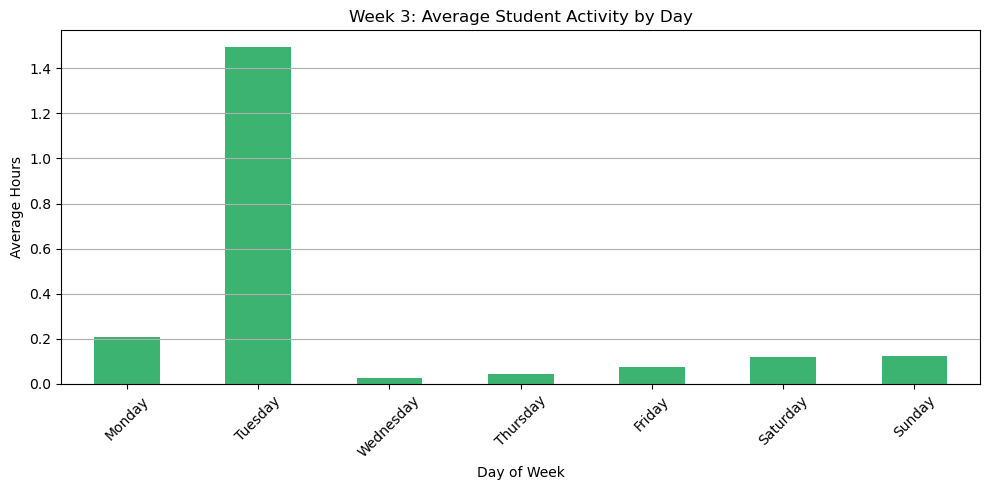

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_3')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 3: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


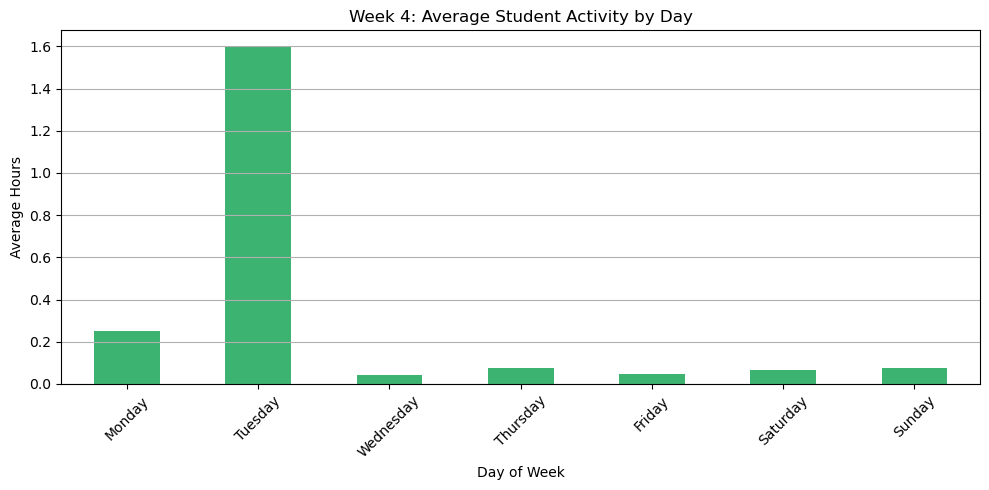

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_4')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 4: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


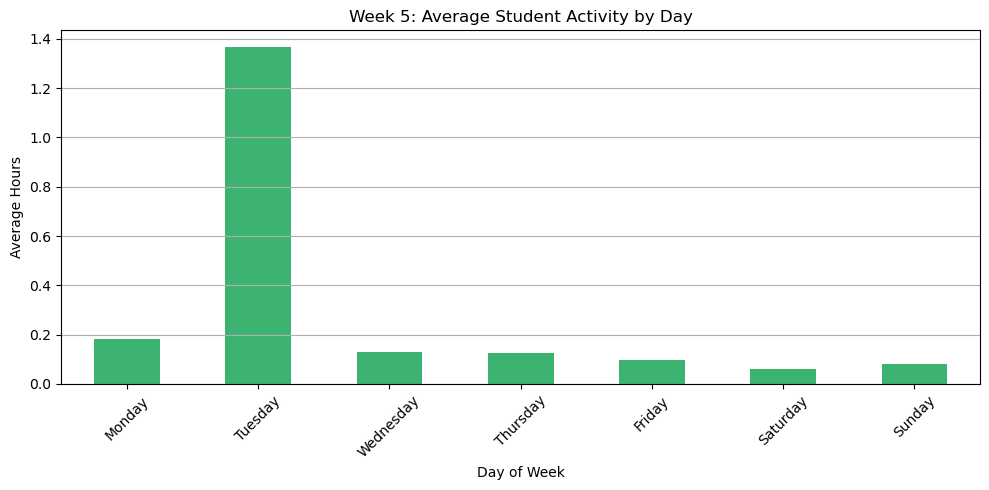

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_5')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 5: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


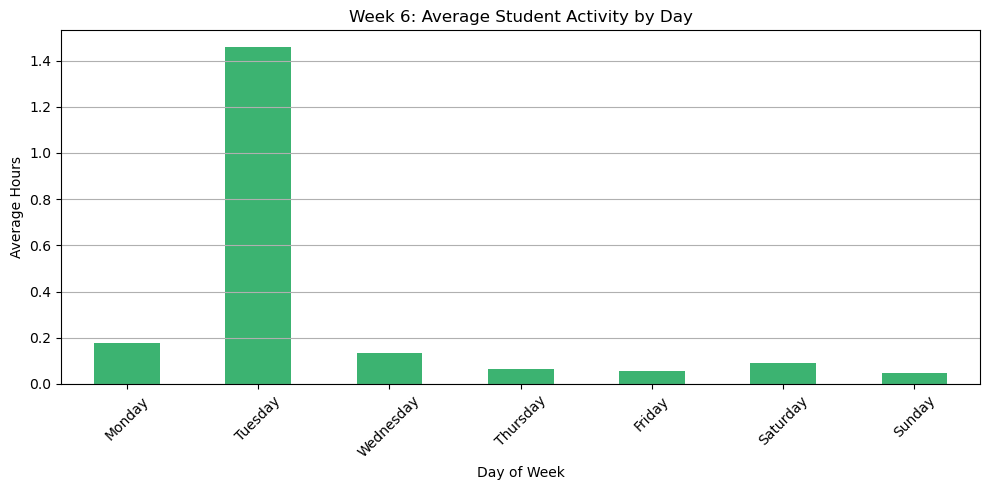

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_6')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 6: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


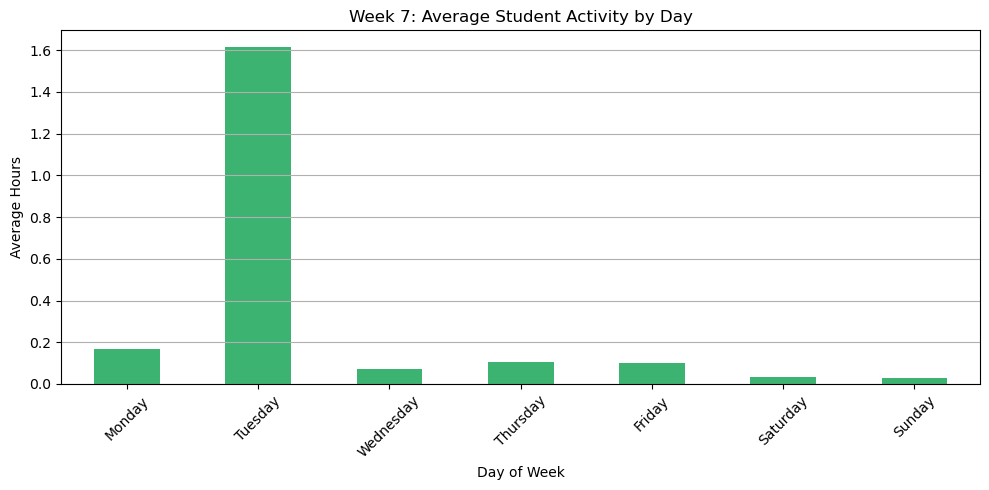

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_7')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 7: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


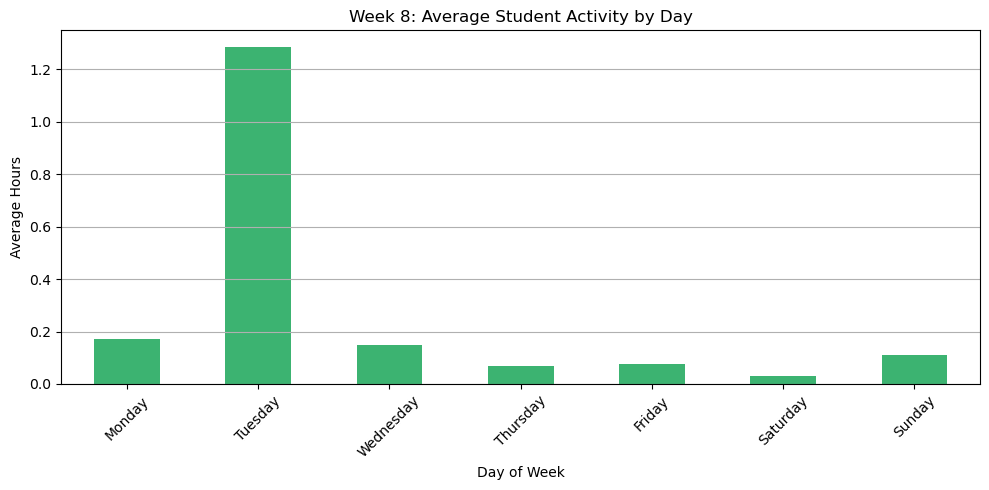

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_8')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 8: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


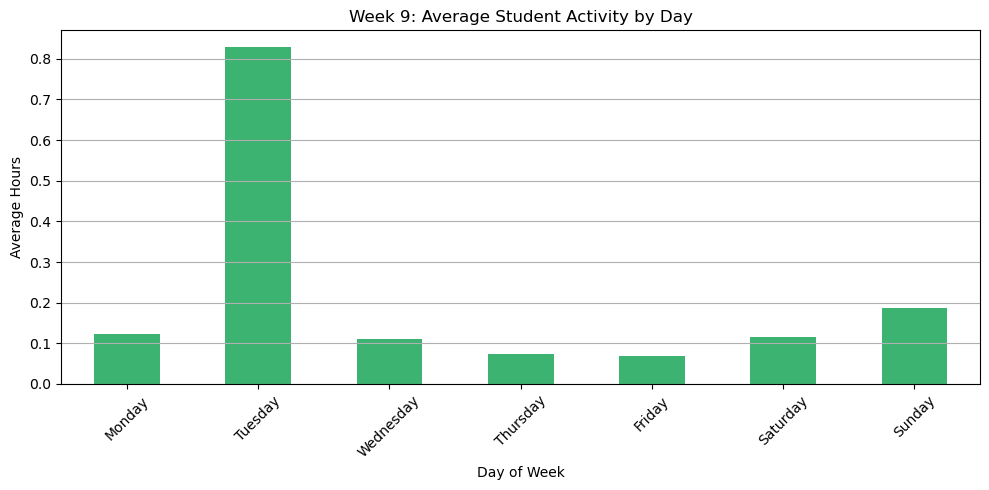

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_9')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 9: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


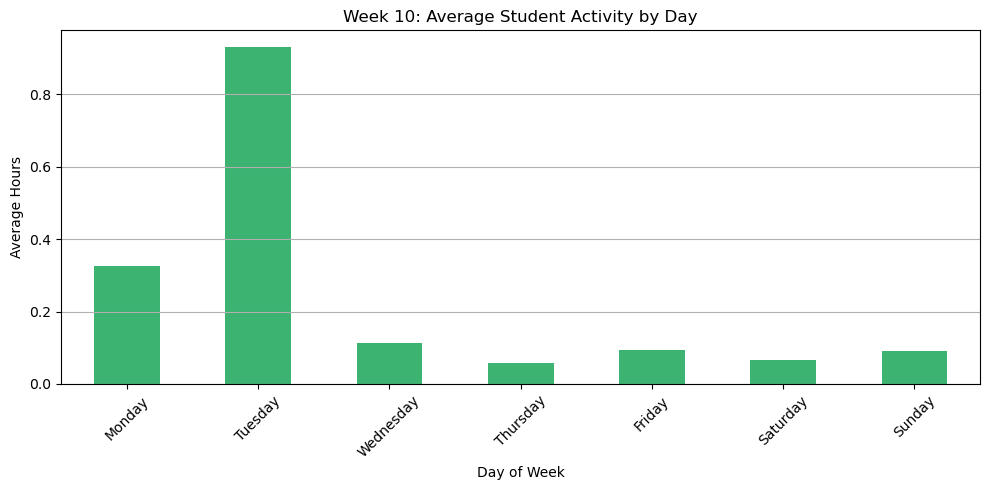

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_10')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 10: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


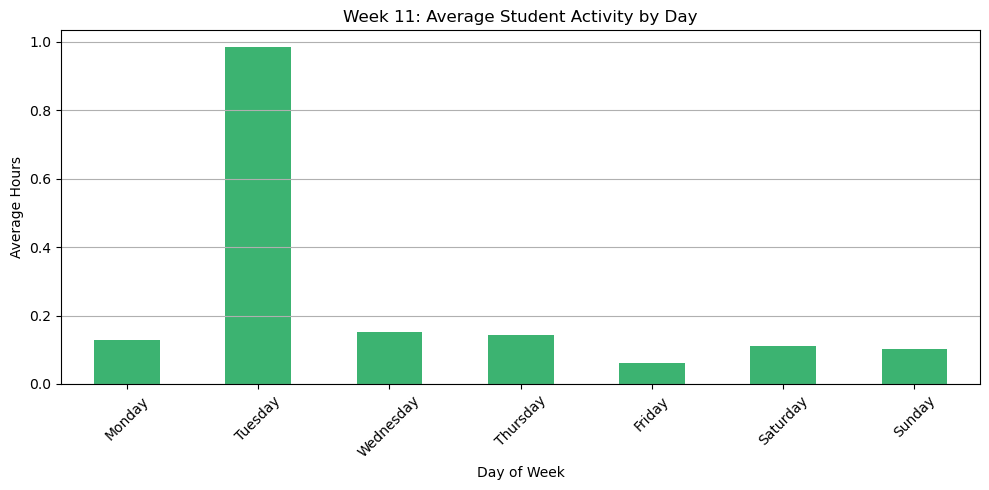

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file and Week 1 sheet
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if needed
df = pd.read_excel(file_path, sheet_name='Week_11')

# Columns for activity by day
activity_cols = [
    'Student Activity by Day in hours Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

# Calculate average activity for each day
weekly_avg = df[activity_cols].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
weekly_avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.plot(kind='bar', color='mediumseagreen')

plt.title("Week 11: Average Student Activity by Day")
plt.ylabel("Average Hours")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


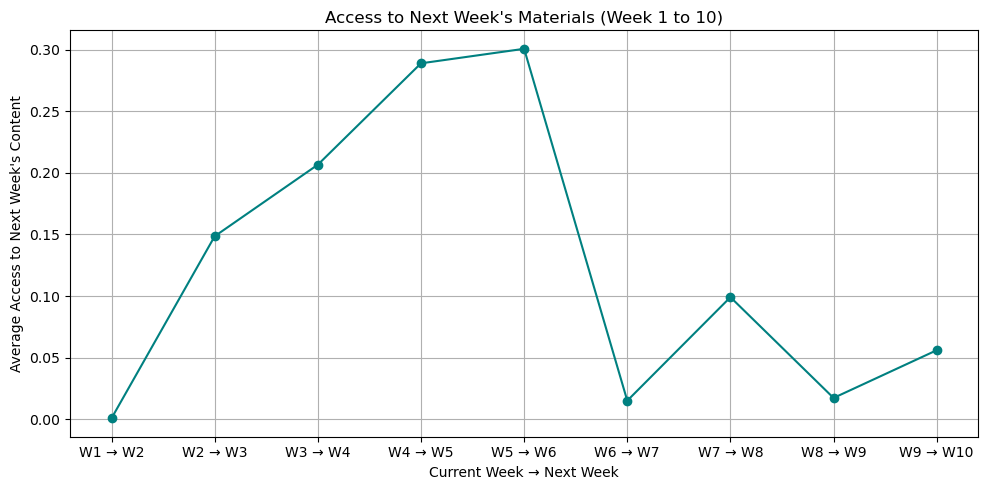

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Load full Excel file
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # Adjust if needed
xlsx = pd.ExcelFile(file_path)

# Initialize storage for weekly averages
week_labels = []
next_week_access_avg = []

# Loop through Week_1 to Week_10
for i in range(1, 11):  # stop at Week 10 since Week 11 has no next week
    current_sheet = f"Week_{i}"
    next_week = f"Week {i + 1}"

    if current_sheet not in xlsx.sheet_names:
        continue
    
    df = pd.read_excel(xlsx, sheet_name=current_sheet)
    
    # Try to find the next week's access column in current week's sheet
    possible_cols = [col for col in df.columns if str(i + 1) in col and 'access' in col.lower()]
    if possible_cols:
        col_name = possible_cols[0]
        avg_access = df[col_name].mean()
        week_labels.append(f"W{i} → W{i+1}")
        next_week_access_avg.append(avg_access)

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(week_labels, next_week_access_avg, marker='o', linestyle='-', color='teal')
plt.title("Access to Next Week's Materials (Week 1 to 10)")
plt.xlabel("Current Week → Next Week")
plt.ylabel("Average Access to Next Week's Content")
plt.grid(True)
plt.tight_layout()
plt.show()


In [105]:
import pandas as pd

# Load Excel file and all sheets
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # Adjust path if needed
xlsx = pd.ExcelFile(file_path)

# Initialize container for next-week access per student
student_access = pd.DataFrame()

# Loop over Week_1 to Week_10 (Week_11 has no next week)
for i in range(1, 11):
    sheet_name = f"Week_{i}"
    if sheet_name not in xlsx.sheet_names:
        continue

    df = pd.read_excel(xlsx, sheet_name=sheet_name)

    # Find next-week access and student ID columns
    next_week_col = [col for col in df.columns if str(i + 1) in col and 'access' in col.lower()]
    id_col = [col for col in df.columns if 'student' in col.lower() and 'id' in col.lower()]

    if next_week_col and id_col:
        col_access = next_week_col[0]
        col_id = id_col[0]

        # Extract and rename columns
        temp = df[[col_id, col_access]].copy()
        temp.columns = ['Student_ID', f'W{i}_to_W{i+1}']
        temp = temp.groupby('Student_ID').sum()

        # Merge to main access table
        student_access = pd.concat([student_access, temp], axis=1)

# Total next-week access across all weeks
student_access['Total_Next_Week_Access'] = student_access.sum(axis=1)

# Load Week 1 to fetch marks and student ID
marks_df = pd.read_excel(xlsx, sheet_name='Week_1')
id_col = [col for col in marks_df.columns if 'student' in col.lower() and 'id' in col.lower()][0]
marks_cols = [col for col in marks_df.columns if 'mark' in col.lower() or 'result' in col.lower() or 'score' in col.lower()]

# Build student-marks table
student_marks = marks_df[[id_col] + marks_cols].copy()
student_marks.columns = ['Student_ID'] + marks_cols

# Merge access + marks
merged = student_access.merge(student_marks, on='Student_ID', how='left')

# Sort to get top and bottom
top_5 = merged.sort_values(by='Total_Next_Week_Access', ascending=False).head(5)
bottom_5 = merged.sort_values(by='Total_Next_Week_Access', ascending=True).head(5)

# Display both
print("🔝 Top 5 Most Proactive Students:\n", top_5)
print("\n🔻 Bottom 5 Least Proactive Students:\n", bottom_5)


🔝 Top 5 Most Proactive Students:
      Student_ID  W1_to_W2  W2_to_W3  W3_to_W4  W4_to_W5  W5_to_W6  W6_to_W7  \
59           60       0.0  0.047500  1.329722  0.018055  1.169722       0.0   
194         195       0.0  0.520000  2.398333  1.107777  2.874722       0.0   
201         202       0.0  0.034167  2.076112  2.711943  0.266112       0.0   
146         147       0.0  0.000000  3.563888  1.480278  0.003612       0.0   
134         135       0.0  1.579445  1.000833  2.305278  0.006667       0.0   

     W7_to_W8  W8_to_W9  W9_to_W10  Total_Next_Week_Access  Overall Result  
59          8  0.145277   3.144722               13.854997            59.0  
194         0  0.000000   0.000000                6.900832            62.4  
201         0  0.000000   0.000000                5.088333            68.2  
146         0  0.000000   0.000000                5.047778            76.2  
134         0  0.000000   0.000000                4.892223            70.6  

🔻 Bottom 5 Least Proactive S

In [115]:
import pandas as pd
from scipy.stats import linregress

# Load Excel file
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"
xlsx = pd.ExcelFile(file_path)

# Load Week 1 sheet
df = pd.read_excel(xlsx, sheet_name='Week_1')

# Weekly access columns
week_cols = [col for col in df.columns if 'Time_accessed_week' in col]

# Engagement slope (drop-off)
df['Engagement_Slope'] = df[week_cols].apply(lambda row: linregress(range(1, len(week_cols)+1), row)[0], axis=1)

# Engagement consistency
df['Engagement_Variance'] = df[week_cols].std(axis=1)

# Early engagement (weeks 1–3)
early_cols = [col for col in week_cols if any(str(w) in col for w in [1, 2, 3])]
df['Early_Engagement_Avg'] = df[early_cols].mean(axis=1)

# Use Overall Result for performance
mark_col = 'Overall Result'

# Flag at-risk students
df['At_Risk'] = (df['Early_Engagement_Avg'] < 2) & (df[mark_col] < 40)

# Final summary table
output_df = df[['Student_ID', 'Engagement_Slope', 'Engagement_Variance', 'Early_Engagement_Avg', mark_col, 'At_Risk']]


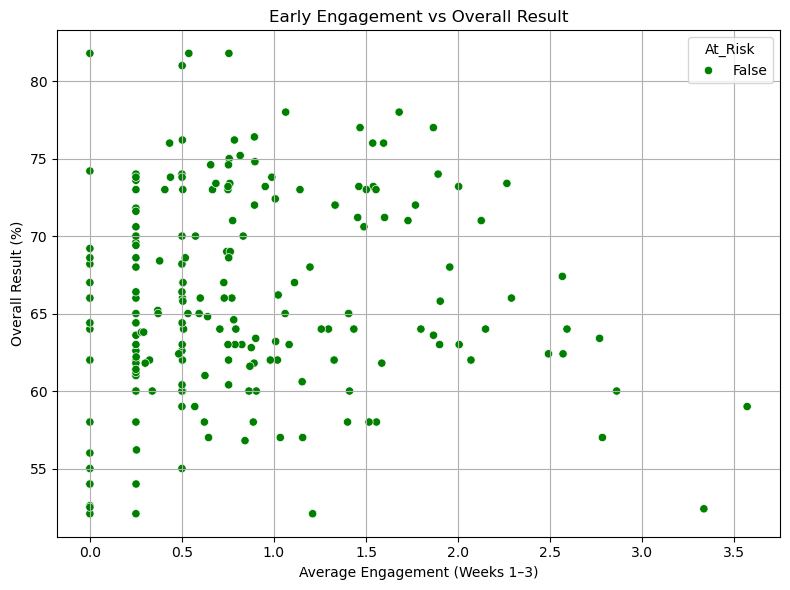

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=output_df,
    x='Early_Engagement_Avg',
    y='Overall Result',
    hue='At_Risk',
    palette={True: 'red', False: 'green'}
)

plt.title("Early Engagement vs Overall Result")
plt.xlabel("Average Engagement (Weeks 1–3)")
plt.ylabel("Overall Result (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


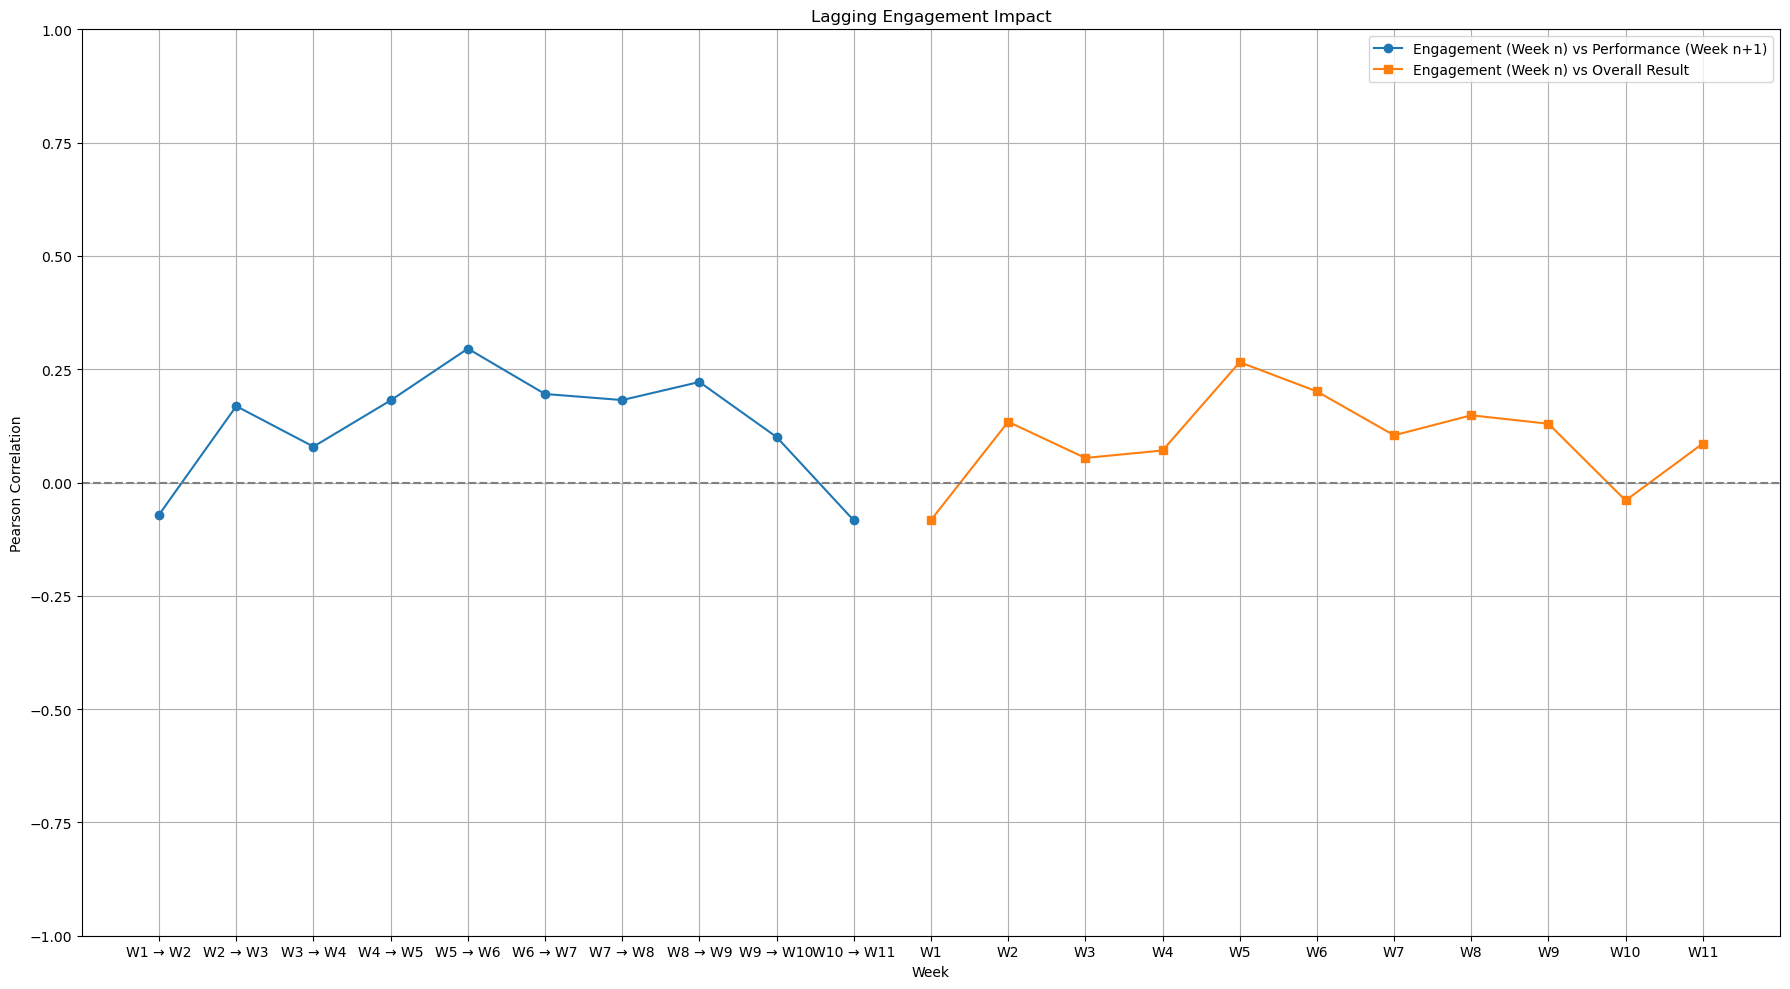

In [121]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load your Excel file
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"  # adjust if path differs
xlsx = pd.ExcelFile(file_path)

# Load Week_1 to get the mark column
reference_df = pd.read_excel(xlsx, sheet_name='Week_1')
mark_col = [col for col in reference_df.columns if 'overall result' in col.lower()][0]

# Store correlations
week_numbers = []
correlations_next_week = []
correlations_final_result = []

# Loop from Week_1 to Week_10 (compare to Week_2 to Week_11)
for i in range(1, 11):
    current_week = f"Week_{i}"
    next_week = f"Week_{i + 1}"

    if current_week in xlsx.sheet_names and next_week in xlsx.sheet_names:
        df_curr = pd.read_excel(xlsx, sheet_name=current_week)
        df_next = pd.read_excel(xlsx, sheet_name=next_week)

        # Find student ID
        student_col = [col for col in df_curr.columns if 'student' in col.lower() and 'id' in col.lower()][0]

        # Find engagement for current week
        engage_col = [col for col in df_curr.columns if f"week {i}" in col.lower() and 'access' in col.lower()]
        if not engage_col:
            engage_col = [col for col in df_curr.columns if f"week_{i}" in col.lower() and 'access' in col.lower()]
        if not engage_col:
            continue

        # Find performance (e.g., CW, overall) from next week's sheet
        perf_cols = [col for col in df_next.columns if 'cw' in col.lower() or 'mark' in col.lower() or 'score' in col.lower() or 'result' in col.lower()]
        if not perf_cols:
            continue

        # Merge on Student_ID
        merged = pd.merge(
            df_curr[[student_col, engage_col[0]]],
            df_next[[student_col, perf_cols[0]]],
            on=student_col,
            how='inner'
        ).dropna()

        if not merged.empty:
            corr1, _ = pearsonr(merged[engage_col[0]], merged[perf_cols[0]])
            correlations_next_week.append(corr1)
            week_numbers.append(f"W{i} → W{i+1}")

# Now compare each week's engagement to Overall Result
for i in range(1, 12):
    week = f"Week_{i}"
    if week in xlsx.sheet_names:
        df = pd.read_excel(xlsx, sheet_name=week)
        student_col = [col for col in df.columns if 'student' in col.lower() and 'id' in col.lower()][0]
        engage_col = [col for col in df.columns if f"week {i}" in col.lower() and 'access' in col.lower()]
        if not engage_col:
            engage_col = [col for col in df.columns if f"week_{i}" in col.lower() and 'access' in col.lower()]
        if not engage_col:
            continue

        # Merge with marks from Week 1
        df_marks = reference_df[[student_col, mark_col]]
        merged = pd.merge(df[[student_col, engage_col[0]]], df_marks, on=student_col, how='inner').dropna()

        if not merged.empty:
            corr2, _ = pearsonr(merged[engage_col[0]], merged[mark_col])
            correlations_final_result.append(corr2)

# Plot both trends
plt.figure(figsize=(18, 10))
plt.plot(week_numbers, correlations_next_week, label="Engagement (Week n) vs Performance (Week n+1)", marker='o')
plt.plot([f"W{i}" for i in range(1, 12)], correlations_final_result, label="Engagement (Week n) vs Overall Result", marker='s')

plt.title("Lagging Engagement Impact")
plt.xlabel("Week")
plt.ylabel("Pearson Correlation")
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


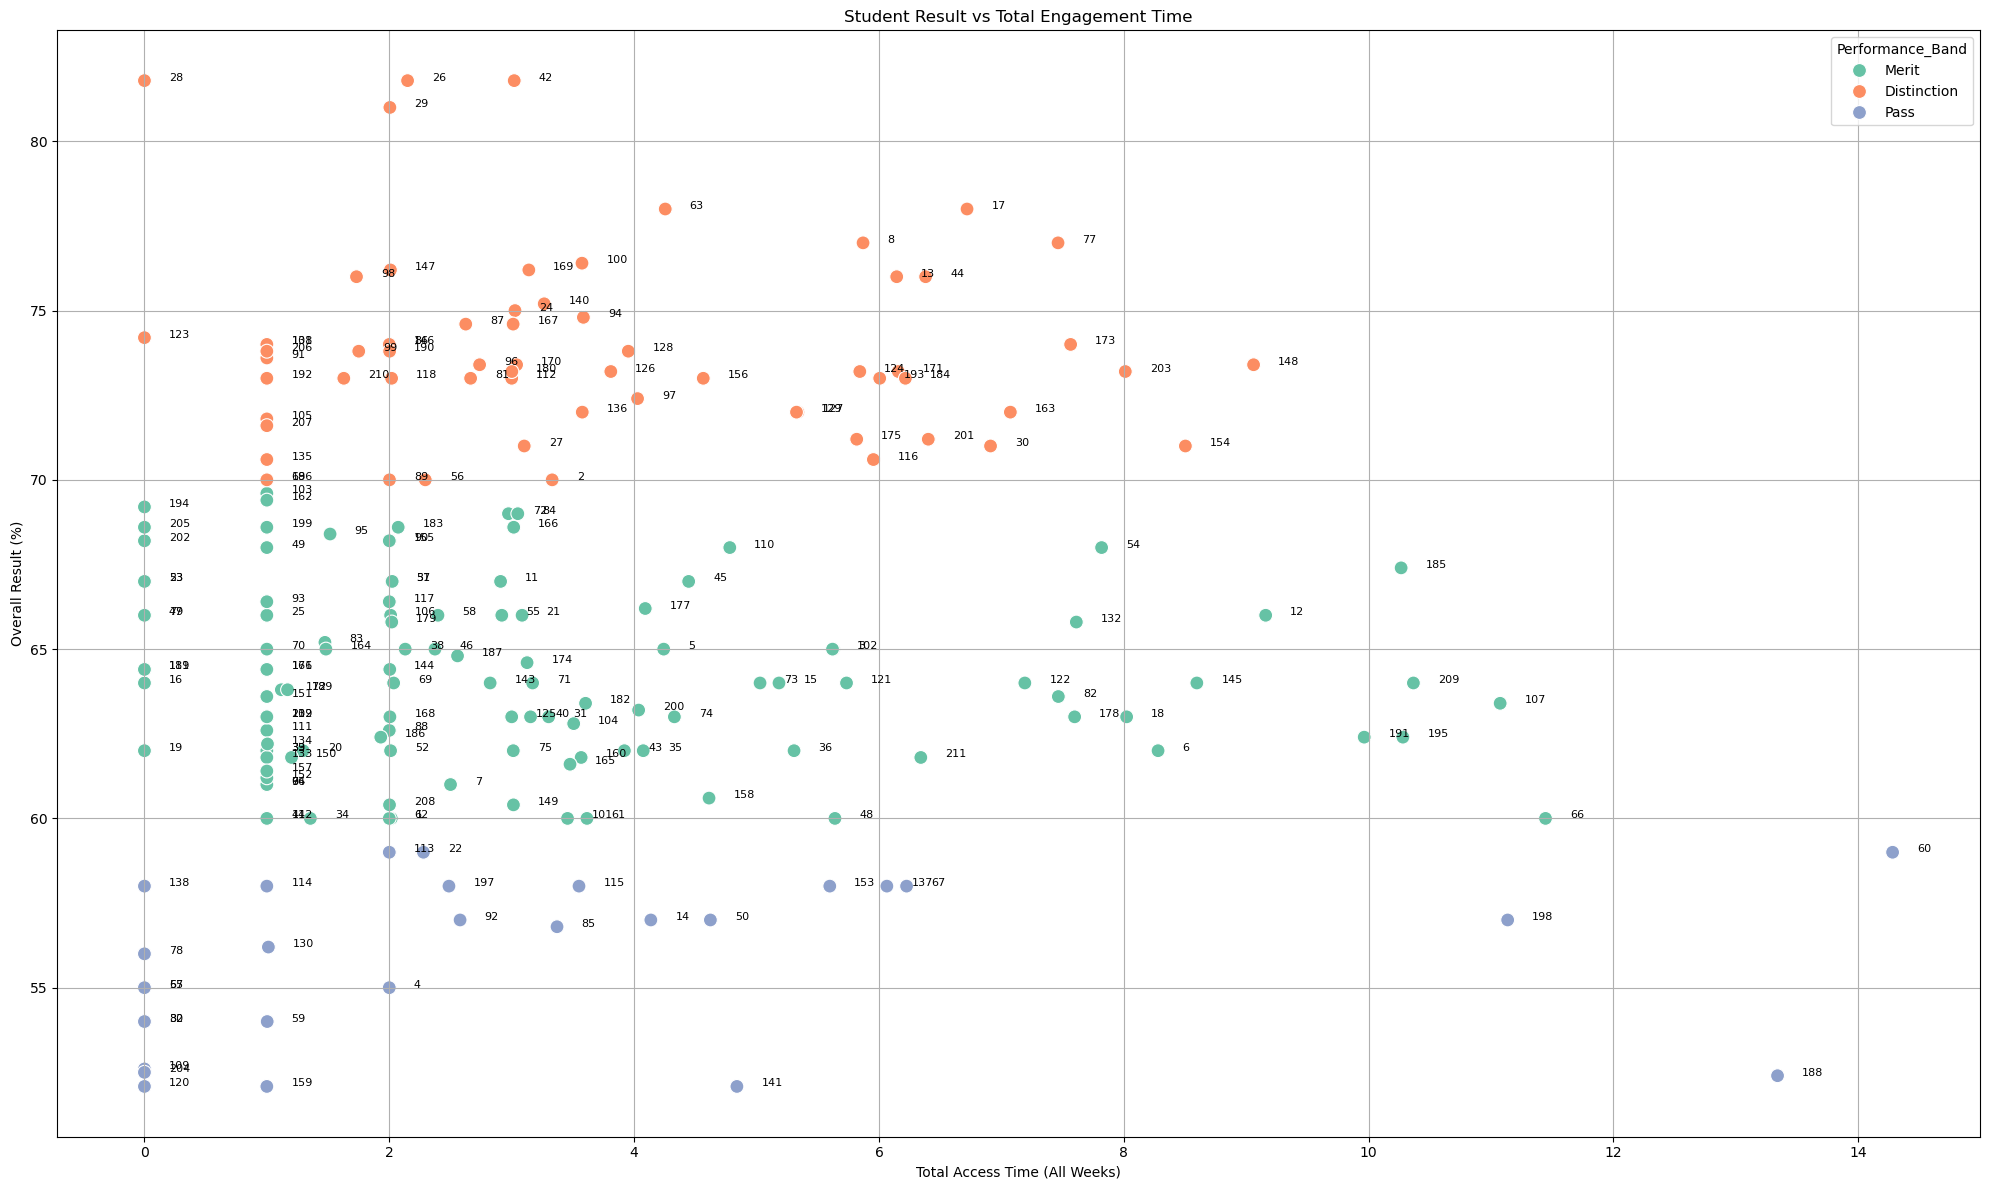

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"
df = pd.read_excel(file_path, sheet_name='Week_1')

# Get week access columns
week_cols = [col for col in df.columns if 'Time_accessed_week' in col]
df['Total_Access_Time'] = df[week_cols].sum(axis=1)

# Grade band function
def categorize(score):
    if score >= 70:
        return 'Distinction'
    elif score >= 60:
        return 'Merit'
    elif score >= 50:
        return 'Pass'
    else:
        return 'Fail'

# Apply band and keep student ID
df['Performance_Band'] = df['Overall Result'].apply(categorize)
df['Student_ID'] = df['Student_ID'].astype(str)

# Plot
plt.figure(figsize=(20, 12))
sns.scatterplot(
    data=df,
    x='Total_Access_Time',
    y='Overall Result',
    hue='Performance_Band',
    palette='Set2',
    s=100
)

# Add student ID labels
for i, row in df.iterrows():
    plt.text(row['Total_Access_Time'] + 0.2, row['Overall Result'], row['Student_ID'], fontsize=8)

plt.title("Student Result vs Total Engagement Time")
plt.xlabel("Total Access Time (All Weeks)")
plt.ylabel("Overall Result (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


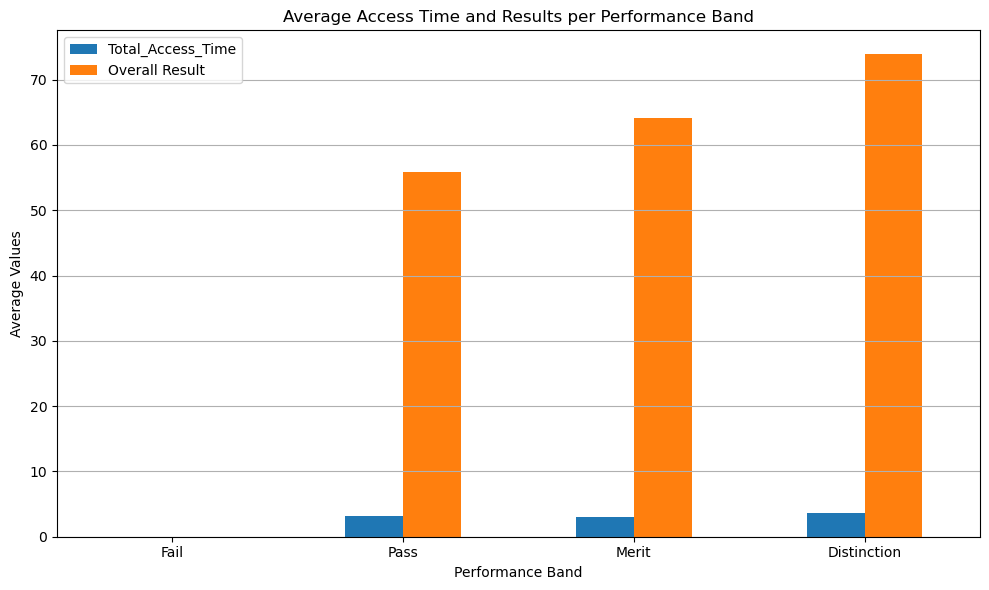

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"
df = pd.read_excel(file_path, sheet_name='Week_1')

# Identify weekly engagement columns
week_cols = [col for col in df.columns if 'Time_accessed_week' in col]
df['Total_Access_Time'] = df[week_cols].sum(axis=1)

# Categorize performance bands
def categorize(score):
    if score >= 70:
        return 'Distinction'
    elif score >= 60:
        return 'Merit'
    elif score >= 50:
        return 'Pass'
    else:
        return 'Fail'

df['Performance_Band'] = df['Overall Result'].apply(categorize)

# Group by band and calculate means
summary = df.groupby('Performance_Band')[['Total_Access_Time', 'Overall Result']].mean().reindex(['Fail', 'Pass', 'Merit', 'Distinction'])

# Plot
summary.plot(kind='bar', figsize=(10, 6), legend=True)
plt.title("Average Access Time and Results per Performance Band")
plt.ylabel("Average Values")
plt.xlabel("Performance Band")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [139]:
import pandas as pd
from scipy.stats import linregress

# Load your dataset
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"
df = pd.read_excel(file_path, sheet_name='Week_1')

# Get access columns for Weeks 1–11
week_cols = [col for col in df.columns if 'Time_accessed_week' in col]

# 1. Total engagement across all weeks
df['Total_Engagement'] = df[week_cols].sum(axis=1)

# 2. Early engagement average (Weeks 1–3)
early_weeks = [col for col in week_cols if any(w in col for w in ['1', '2', '3'])]
df['Early_Engagement_Avg'] = df[early_weeks].mean(axis=1)

# 3. Engagement slope (drop-off over time)
df['Engagement_Slope'] = df[week_cols].apply(
    lambda row: linregress(range(len(week_cols)), row.values)[0], axis=1
)

# 4. Use 'Overall Result' as performance
mark_col = [col for col in df.columns if 'overall result' in col.lower()][0]

# 5. Define Risk Flags
df['Low_Early_Engagement'] = df['Early_Engagement_Avg'] < 2
df['Low_Total_Engagement'] = df['Total_Engagement'] < 15
df['Poor_Result'] = df[mark_col] < 50
df['Engagement_Dropping'] = df['Engagement_Slope'] < 0

# 6. Combine into At-Risk Flag (if any condition is True)
df['At_Risk'] = df[['Low_Early_Engagement', 'Low_Total_Engagement', 'Poor_Result', 'Engagement_Dropping']].any(axis=1)

# 7. Show only At-Risk Students (optional)
at_risk_students = df[df['At_Risk']][['Student_ID', mark_col, 'Total_Engagement', 'Early_Engagement_Avg', 'Engagement_Slope', 'At_Risk']]

# Export or display
print(at_risk_students.head())


   Student_ID  Overall Result  Total_Engagement  Early_Engagement_Avg  \
0           1            60.0          2.016388              0.504097   
1           2            70.0          3.330555              0.832639   
2           3            65.0          5.628055              1.407014   
3           4            55.0          2.000000              0.500000   
4           5            65.0          4.241667              1.060417   

   Engagement_Slope  At_Risk  
0          0.195084     True  
1         -0.199166     True  
2         -0.088416     True  
3          0.200000     True  
4         -0.472500     True  


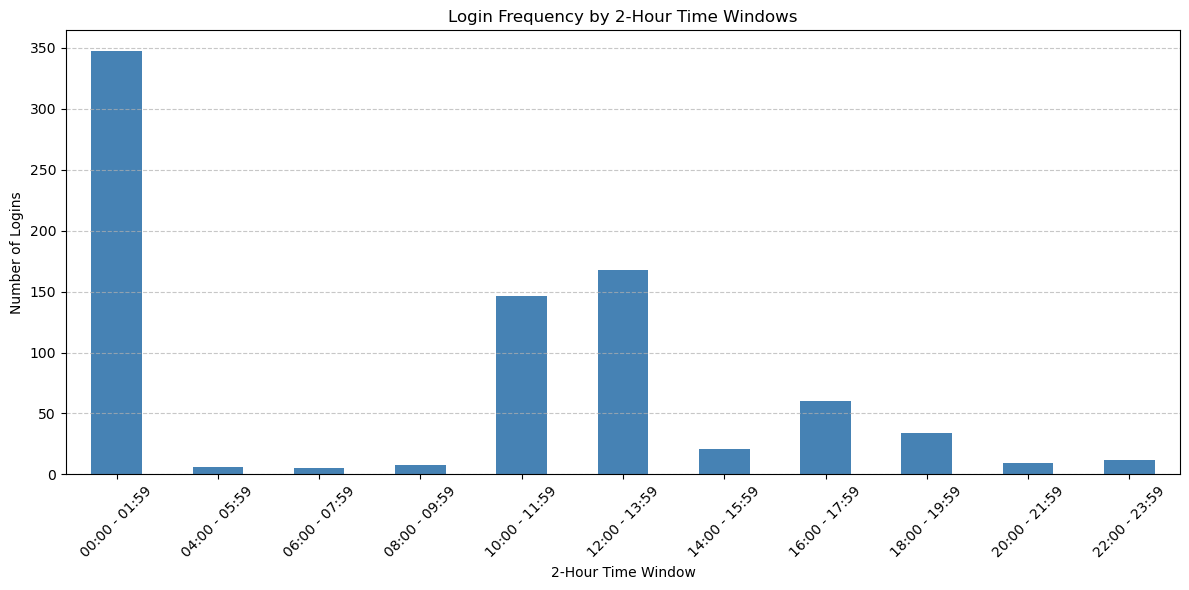

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Newdata/cleaned_new.xlsx")

# Find all initial access timestamp columns
time_cols = [col for col in df.columns if "initial" in col.lower()]

# Convert to datetime
for col in time_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Combine all timestamp columns into a long format
long_df = df.melt(value_vars=time_cols, var_name='Resource', value_name='AccessTime')
long_df.dropna(subset=['AccessTime'], inplace=True)

# Extract hour and create 2-hour time bin
long_df['Hour'] = long_df['AccessTime'].dt.hour
long_df['2-Hour Window'] = long_df['Hour'].apply(lambda x: f"{x:02d}:00 - {x+1:02d}:59" if x % 2 == 0 else f"{x-1:02d}:00 - {x:02d}:59")

# Count logins per 2-hour window
window_counts = long_df['2-Hour Window'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
window_counts.plot(kind='bar', color='steelblue')
plt.title("Login Frequency by 2-Hour Time Windows")
plt.xlabel("2-Hour Time Window")
plt.ylabel("Number of Logins")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from pathlib import Path

# Load Excel files
file1 = Path("C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Newdata/NewData/cleaned_data01.xlsx")  # Group assignments
file2 = Path("C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Newdata/NewData/cleaned_new2 revised .xlsx")  # Individual assignments

# Load and combine sheets
xls1 = pd.ExcelFile(file1)
xls2 = pd.ExcelFile(file2)

df1_all = pd.concat([xls1.parse(sheet).assign(Week=sheet) for sheet in xls1.sheet_names], ignore_index=True)
df2_all = pd.concat([xls2.parse(sheet).assign(Week=sheet) for sheet in xls2.sheet_names], ignore_index=True)

# Normalize column names
df1_all.columns = df1_all.columns.str.strip()
df2_all.columns = df2_all.columns.str.strip()

# Identify common students
students_group = set(df1_all['Student_ID'].unique())
students_indiv = set(df2_all['Student_ID'].unique())
common_students = students_group.intersection(students_indiv)

# Filter for common students
df1_common = df1_all[df1_all['Student_ID'].isin(common_students)].copy()
df2_common = df2_all[df2_all['Student_ID'].isin(common_students)].copy()

# Compute average scores
df1_scores = df1_common.groupby('Student_ID')["Overall Result"].mean().rename("Group_Assignment_Score")
df2_scores = df2_common.groupby('Student_ID')["Overall Result"].mean().rename("Individual_Assignment_Score")

# Merge scores
merged_scores = pd.concat([df1_scores, df2_scores], axis=1).dropna()

# Compute login counts
login_cols_group = [col for col in df1_common.columns if 'Times Accessed' in col]
login_cols_indiv = [col for col in df2_common.columns if 'Times Accessed' in col]

df1_login = df1_common.groupby('Student_ID')[login_cols_group].apply(lambda x: (x > 0).sum().sum()).rename("Group_Logins")
df2_login = df2_common.groupby('Student_ID')[login_cols_indiv].apply(lambda x: (x > 0).sum().sum()).rename("Individual_Logins")

# Final combined dataframe
final_df = pd.concat([merged_scores, df1_login, df2_login], axis=1).dropna()

# Show top 10 for preview
print(final_df.head(10))

# Optional: save to Excel
final_df.to_excel("group_vs_individual_comparison.xlsx")


            Group_Assignment_Score  Individual_Assignment_Score  Group_Logins  \
Student_ID                                                                      
1                             60.0                         56.0            38   
2                             70.0                         48.0            35   
3                             65.0                         62.0            50   
4                             55.0                         63.0            27   
5                             65.0                         64.0            32   
6                             62.0                         57.0            36   
7                             61.0                         72.0            26   
8                             77.0                         68.0            47   
9                             61.0                         70.0            32   
10                            63.0                         72.0            48   

            Individual_Logi

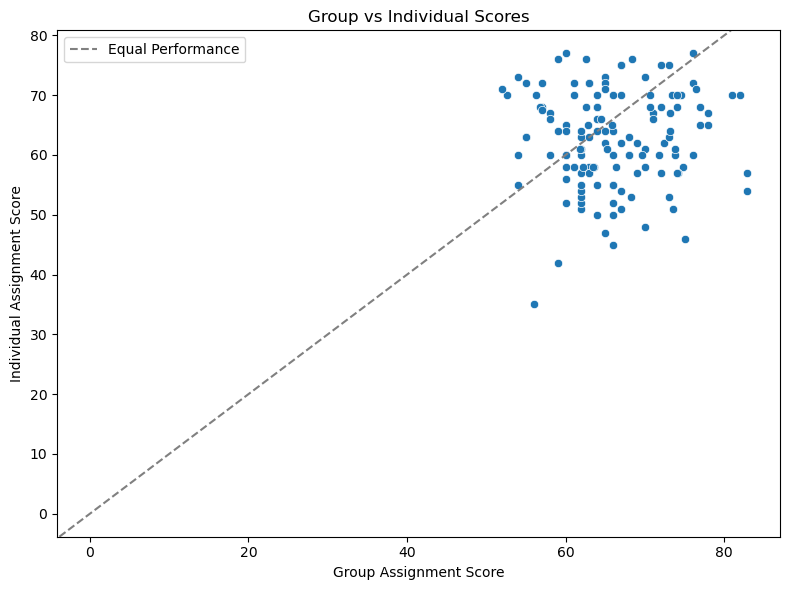

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

final_df = pd.read_excel("group_vs_individual_comparison.xlsx", index_col=0)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=final_df,
    x="Group_Assignment_Score",
    y="Individual_Assignment_Score"
)
plt.title("Group vs Individual Scores")
plt.xlabel("Group Assignment Score")
plt.ylabel("Individual Assignment Score")
plt.axline((0, 0), slope=1, linestyle='--', color='gray', label='Equal Performance')
plt.legend()
plt.tight_layout()
plt.show()


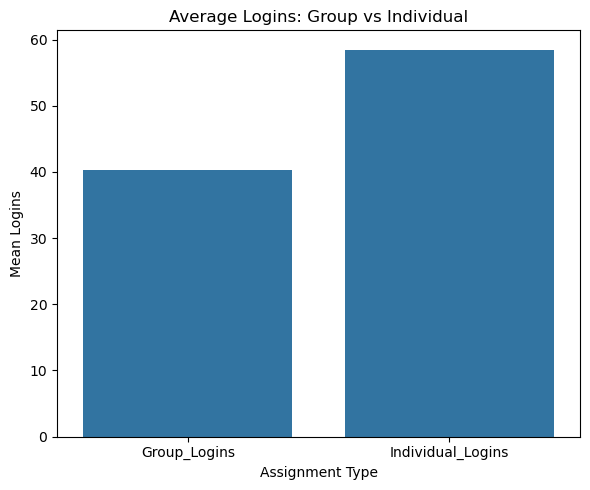

In [9]:
plt.figure(figsize=(6, 5))
login_means = final_df[["Group_Logins", "Individual_Logins"]].mean().reset_index()
login_means.columns = ['Assignment Type', 'Mean Logins']

sns.barplot(data=login_means, x='Assignment Type', y='Mean Logins')
plt.title("Average Logins: Group vs Individual")
plt.tight_layout()
plt.show()


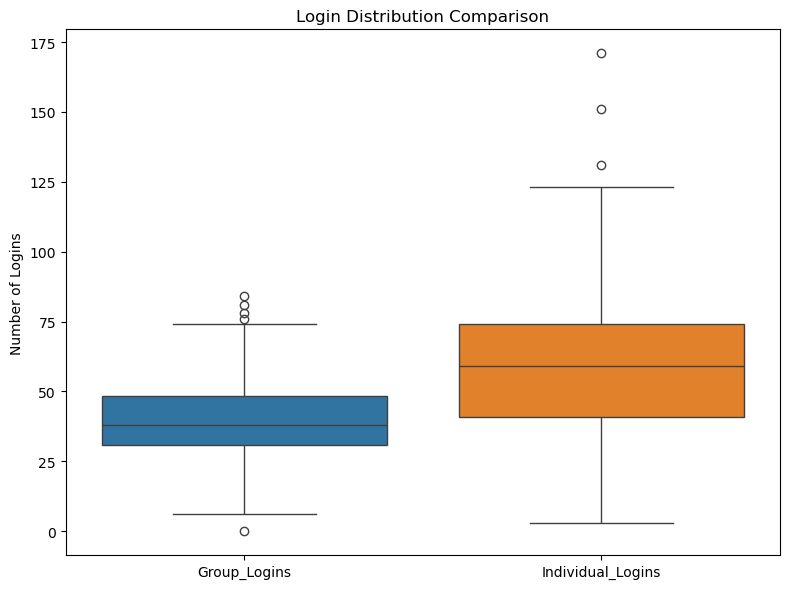

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=final_df[["Group_Logins", "Individual_Logins"]])
plt.title("Login Distribution Comparison")
plt.ylabel("Number of Logins")
plt.tight_layout()
plt.show()


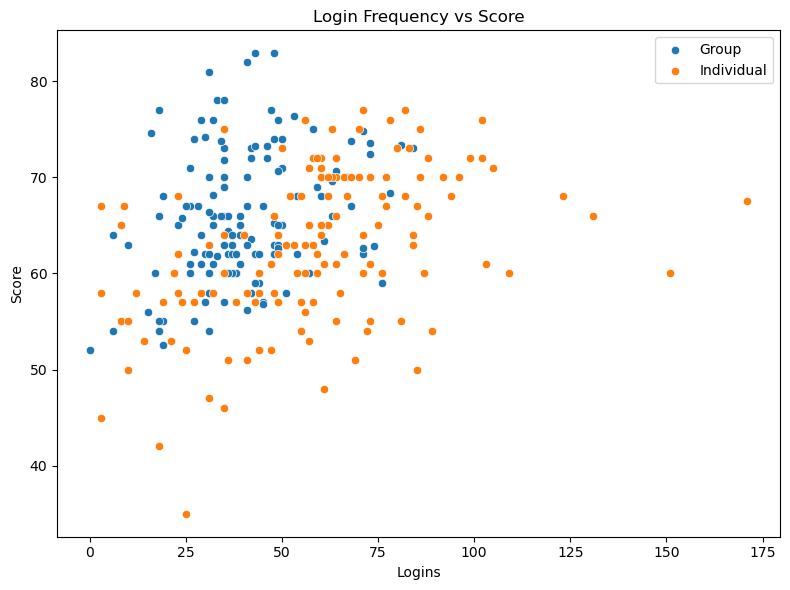

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=final_df,
    x="Group_Logins",
    y="Group_Assignment_Score",
    label='Group'
)
sns.scatterplot(
    data=final_df,
    x="Individual_Logins",
    y="Individual_Assignment_Score",
    label='Individual'
)
plt.title("Login Frequency vs Score")
plt.xlabel("Logins")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


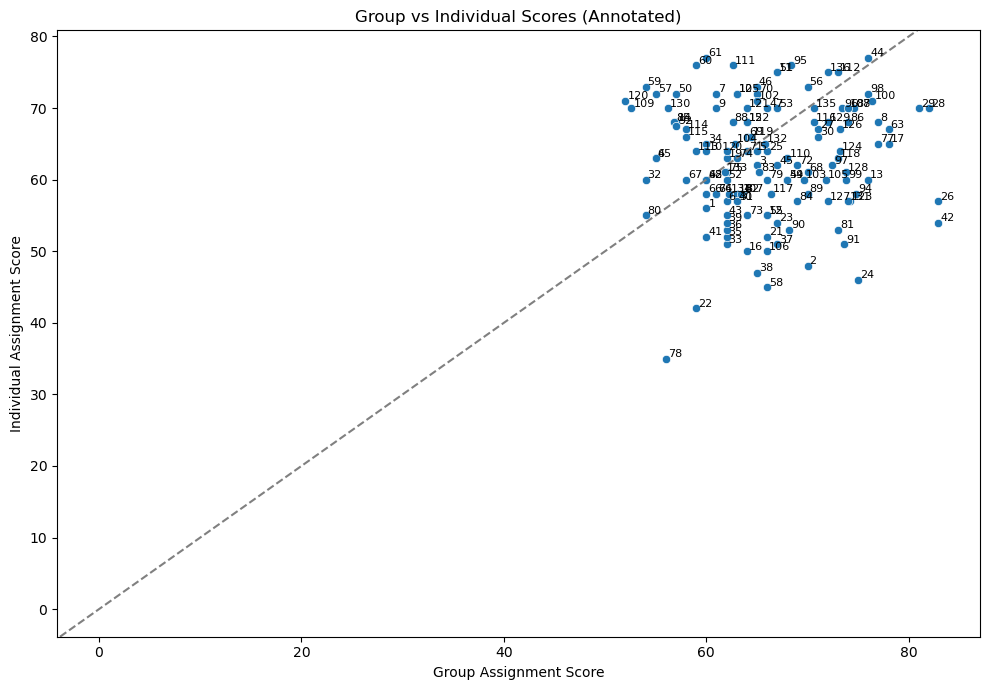

In [15]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=final_df,
    x="Group_Assignment_Score",
    y="Individual_Assignment_Score"
)

# Annotate with Student_ID
for i, row in final_df.iterrows():
    plt.text(
        row["Group_Assignment_Score"] + 0.2,
        row["Individual_Assignment_Score"] + 0.2,
        str(row.name),  # assuming Student_ID is the index
        fontsize=8
    )

plt.title("Group vs Individual Scores (Annotated)")
plt.xlabel("Group Assignment Score")
plt.ylabel("Individual Assignment Score")
plt.axline((0, 0), slope=1, linestyle='--', color='gray')
plt.tight_layout()
plt.show()


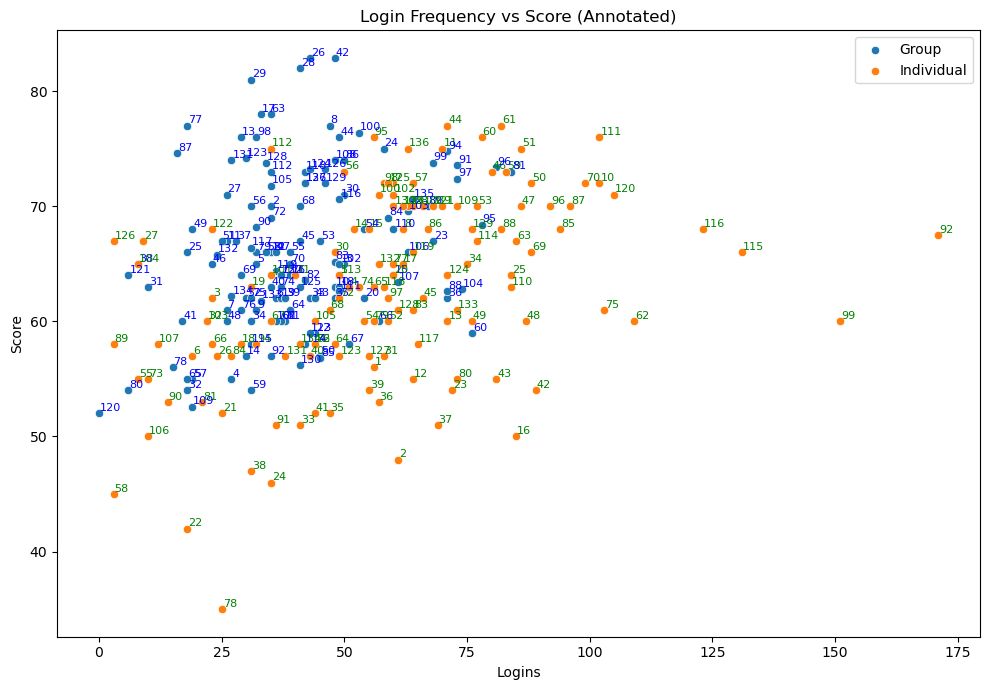

In [17]:
plt.figure(figsize=(10, 7))

# Group Logins
sns.scatterplot(
    data=final_df,
    x="Group_Logins",
    y="Group_Assignment_Score",
    label='Group'
)

# Individual Logins
sns.scatterplot(
    data=final_df,
    x="Individual_Logins",
    y="Individual_Assignment_Score",
    label='Individual'
)

# Annotate both sets
for i, row in final_df.iterrows():
    plt.text(row["Group_Logins"] + 0.2, row["Group_Assignment_Score"] + 0.2, str(row.name), fontsize=8, color='blue')
    plt.text(row["Individual_Logins"] + 0.2, row["Individual_Assignment_Score"] + 0.2, str(row.name), fontsize=8, color='green')

plt.title("Login Frequency vs Score (Annotated)")
plt.xlabel("Logins")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


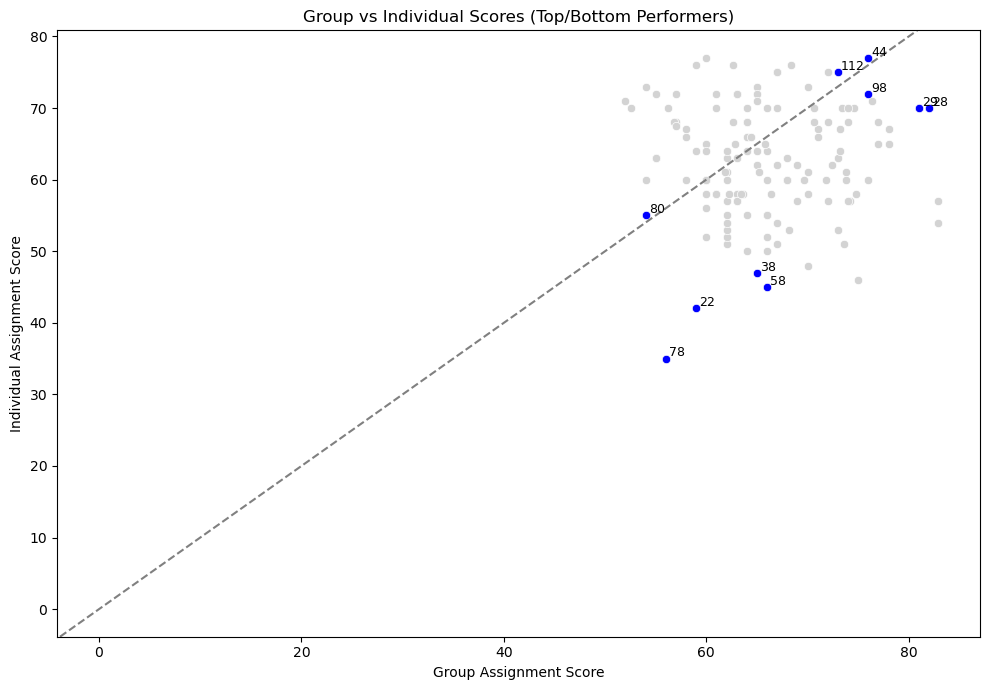

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average score
final_df["Average_Score"] = (final_df["Group_Assignment_Score"] + final_df["Individual_Assignment_Score"]) / 2

# Get top 5 and bottom 5 performers
top5 = final_df.nlargest(5, "Average_Score")
bottom5 = final_df.nsmallest(5, "Average_Score")
annotate_df = pd.concat([top5, bottom5])

# Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=final_df,
    x="Group_Assignment_Score",
    y="Individual_Assignment_Score",
    color="lightgray"
)
sns.scatterplot(
    data=annotate_df,
    x="Group_Assignment_Score",
    y="Individual_Assignment_Score",
    color="blue"
)

# Annotate only selected students
for i, row in annotate_df.iterrows():
    plt.text(
        row["Group_Assignment_Score"] + 0.3,
        row["Individual_Assignment_Score"] + 0.3,
        str(row.name),  # Student_ID assumed as index
        fontsize=9,
        color='black'
    )

plt.title("Group vs Individual Scores (Top/Bottom Performers)")
plt.xlabel("Group Assignment Score")
plt.ylabel("Individual Assignment Score")
plt.axline((0, 0), slope=1, linestyle='--', color='gray')
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load Excel file ---
file_path = "C:/Users/DuminduS/Desktop/UWE/IGP/Project/data sets/Cleaned_Data/cleaned_dataset1.xlsx"
xlsx = pd.ExcelFile(file_path)

# --- Extract next-week access from Week 1 to Week 10 ---
student_access = pd.DataFrame()

for i in range(1, 11):
    sheet_name = f"Week_{i}"
    if sheet_name not in xlsx.sheet_names:
        continue

    df = pd.read_excel(xlsx, sheet_name=sheet_name)
    next_week_col = [col for col in df.columns if str(i + 1) in col and 'access' in col.lower()]
    id_col = [col for col in df.columns if 'student' in col.lower() and 'id' in col.lower()]

    if next_week_col and id_col:
        col_access = next_week_col[0]
        col_id = id_col[0]
        temp = df[[col_id, col_access]].copy()
        temp.columns = ['Student_ID', f'W{i}_to_W{i+1}']
        temp = temp.groupby('Student_ID').sum()
        student_access = pd.concat([student_access, temp], axis=1)

# --- Total engagement metric ---
student_access['Total_Next_Week_Access'] = student_access.sum(axis=1)

# --- Load Week 1 marks to merge performance ---
marks_df = pd.read_excel(xlsx, sheet_name='Week_1')
id_col = [col for col in marks_df.columns if 'student' in col.lower() and 'id' in col.lower()][0]
marks_cols = [col for col in marks_df.columns if 'mark' in col.lower() or 'result' in col.lower() or 'score' in col.lower()]

student_marks = marks_df[[id_col] + marks_cols].copy()
student_marks.columns = ['Student_ID'] + marks_cols

# --- Merge access and marks ---
merged = student_access.merge(student_marks, on='Student_ID', how='left')

# --- Sort for top and bottom 5 students ---
top_5 = merged.sort_values(by='Total_Next_Week_Access', ascending=False).head(5)
bottom_5 = merged.sort_values(by='Total_Next_Week_Access', ascending=True).head(5)

# --- Display tables ---
print("🔝 Top 5 Most Proactive Students:\n", top_5)
print("\n🔻 Bottom 5 Least Proactive Students:\n", bottom_5)

# --- Plot 1: Top 5 Bar Chart ---
plt.figure(figsize=(8, 5))
plt.bar(top_5['Student_ID'].astype(str), top_5['Total_Next_Week_Access'], color='green')
plt.title("Top 5 Most Proactive Students")
plt.xlabel("Student ID")
plt.ylabel("Next-Week Access Count")
plt.tight_layout()
plt.show()

# --- Plot 2: Bottom 5 Bar Chart ---
plt.figure(figsize=(8, 5))
plt.bar(bottom_5['Student_ID'].astype(str), bottom_5['Total_Next_Week_Access'], color='red')
plt.title("Bottom 5 Least Proactive Students")
plt.xlabel("Student ID")
plt.ylabel("Next-Week Access Count")
plt.tight_layout()
plt.show()

# --- Optional: Show comparison of scores ---
print("\n📊 Comparison of Total Access and Marks (Top & Bottom 5):")
print(pd.concat([top_5, bottom_5])[['Total_Next_Week_Access'] + marks_cols])


🔝 Top 5 Most Proactive Students:
      Student_ID  W1_to_W2  W2_to_W3  W3_to_W4  W4_to_W5  W5_to_W6  W6_to_W7  \
59           60       0.0  0.047500  1.329722  0.018055  1.169722       0.0   
194         195       0.0  0.520000  2.398333  1.107777  2.874722       0.0   
201         202       0.0  0.034167  2.076112  2.711943  0.266112       0.0   
146         147       0.0  0.000000  3.563888  1.480278  0.003612       0.0   
134         135       0.0  1.579445  1.000833  2.305278  0.006667       0.0   

     W7_to_W8  W8_to_W9  W9_to_W10  Total_Next_Week_Access  Overall Result  
59          8  0.145277   3.144722               13.854997            59.0  
194         0  0.000000   0.000000                6.900832            62.4  
201         0  0.000000   0.000000                5.088333            68.2  
146         0  0.000000   0.000000                5.047778            76.2  
134         0  0.000000   0.000000                4.892223            70.6  

🔻 Bottom 5 Least Proactive S

C:\Users\DuminduS\AppData\Local\Temp\ipykernel_11784\3574993839.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\DuminduS\AppData\Local\Temp\ipykernel_11784\3574993839.py:66: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()



📊 Comparison of Total Access and Marks (Top & Bottom 5):
     Total_Next_Week_Access  Overall Result
59                13.854997        59.00000
194                6.900832        62.40000
201                5.088333        68.20000
146                5.047778        76.20000
134                4.892223        70.60000
56                 0.000000        55.00000
30                 0.000000        63.00000
119                0.000000        52.08316
37                 0.000000        65.00000
133                0.000000        62.20000
